# Mašinsko Učenje

<h3> Milan Stanković br. ind. 1407</h3>
<h3> Aleksandar Stamenković br. ind. 1403</h3>

Univerzitet u Nišu <br>
Elektronski Fakultet

Studijski program: Računarstvo i Informatika<br>
Modul: Bezbednost Računarskih Sistema<br>
Predmet: Mašinsko Učenje<br>



# Uvod

<h2> Heart disease</h2>
<h3> Informacije o datasetu: </h3>

<a>Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data </a>

<p>This is the dataset used in the section "ANN (Artificial Neural Networks)" of the Udemy course from Kirill Eremenko 
(Data Scientist & Forex Systems Expert) and Hadelin de Ponteves (Data Scientist), called Deep Learning A-Z™: Hands-On 
Artificial Neural Networks. The dataset is very useful for beginners of Machine Learning, and a simple playground where 
to compare several techniques/skills.

The story:
A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and 
predict which of the customers are more likely to leave the bank soon.

<h3> Atributi: </h3>

1. RowNumber
2. CustomerId
3. Surname
4. CreditScore
5. Geography - Country where customer is living
6. Gender
7. Age
8. Tenure
9. Balance - Mount of money customer have
10. NumOfProducts - number of products that customer is using
11. HasCrCard - does customer have credit card
12. IsActiveMember - is customer active member
13. EstimatedSalary
14. Exited - did customer exited from the bank


# 1. Importovanje biblioteka i učitavanje dataseta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import losses
import keras.backend as K
import tensorflow.keras.backend as kb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
app_df = pd.read_csv("./data/Churn_Modelling.csv")
app_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Predprocesiranje

# 2.1 Brisanje nepotrebnih kolona

In [3]:
app_df.drop('RowNumber', axis='columns', inplace=True)
app_df.drop('CustomerId', axis='columns', inplace=True)
app_df.drop('Surname', axis='columns', inplace=True)

## 2.2 Prikaz tipova podataka

In [4]:
app_df.head()
app_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
for c in app_df.select_dtypes(include=['object']).columns:
    print("Unique values in {}: {}, count: {}".format(c, app_df[c].unique(), len(app_df[c].unique())))

Unique values in Geography: ['France' 'Spain' 'Germany'], count: 3
Unique values in Gender: ['Female' 'Male'], count: 2


In [6]:
app_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2.3 Provera nedostajućih (null) vrednosti

In [7]:
app_df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
app_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2.3 Provera nedostajućih (null) vrednosti

Kao što se može videti, nemamo duplikate.

In [9]:
duplicates = app_df.duplicated().sum()
duplicates

0

# 3. Statistika podataka
## 3.1 Opis dataseta

Numeric features:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


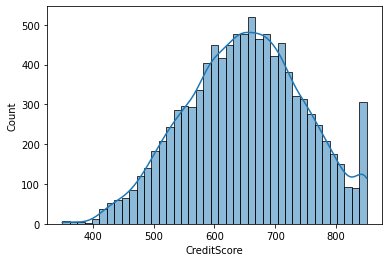

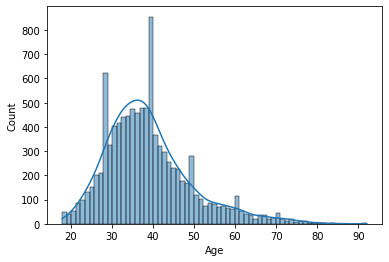

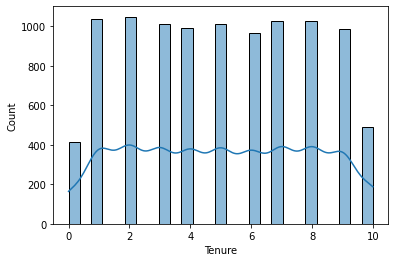

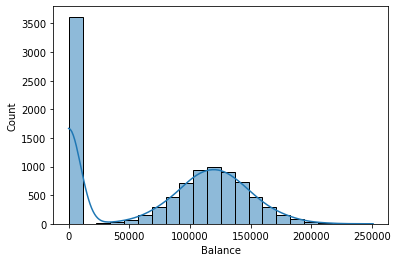

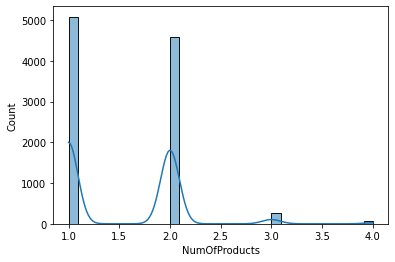

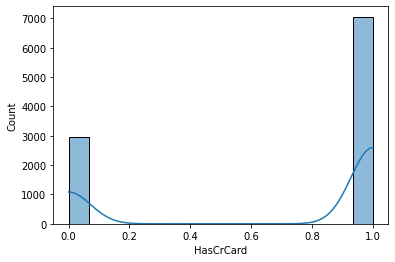

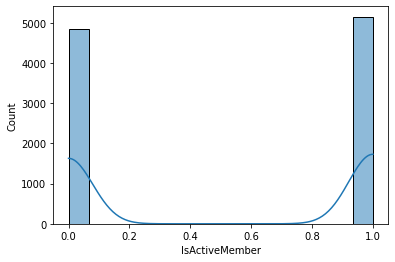

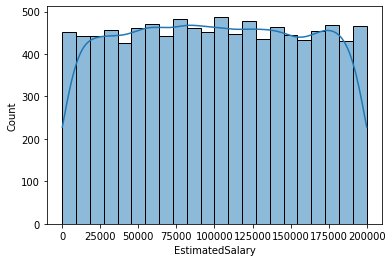

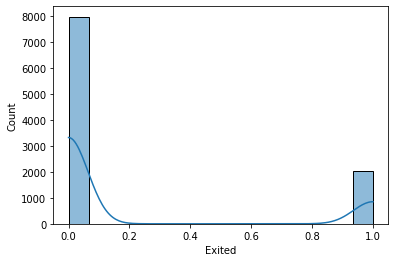

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
numerical_features = app_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print('Numeric features: ',numerical_features)

for col in numerical_features:
    plt.figure()
    sns.histplot(data=app_df, x=col, kde=True)

## 3.2 Korelaciona matrica parametara

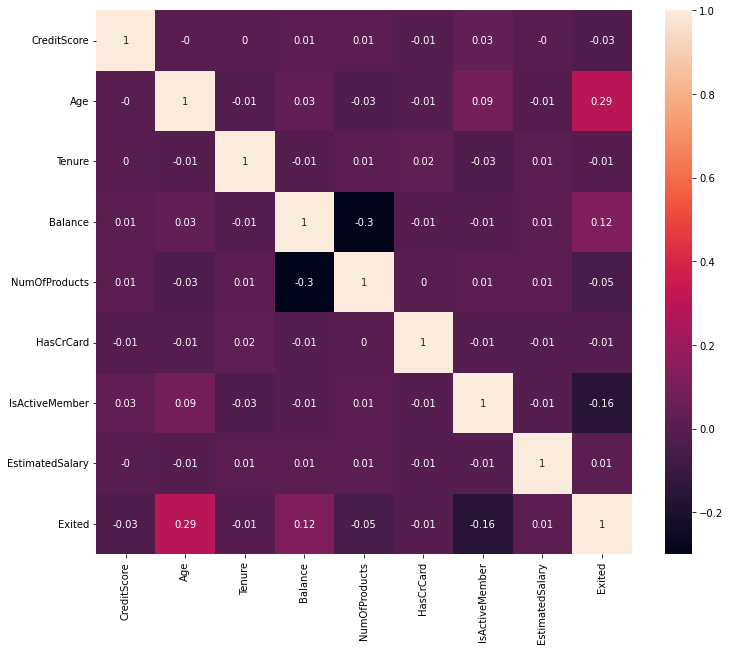

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = app_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## 3.3 Konvertovanje enumeracija u numeričke vrednosti

In [12]:
app_df.drop('Geography', axis='columns', inplace=True)
app_df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
app_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


## 3.4 Prikaz odnosa starosti osoba

In [13]:
#sns.pairplot(app_df,hue='Exited')

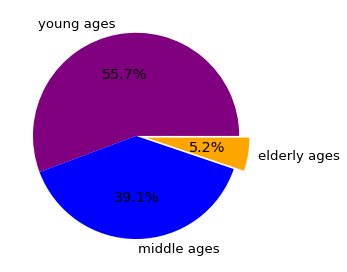

In [14]:
Young = app_df[(app_df.Age>=28)&(app_df.Age<40)]
Middle = app_df[(app_df.Age>=40)&(app_df.Age<60)]
Elder = app_df[(app_df.Age>60)]
colors = ['purple','blue','orange']
explode = [0,0,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

# 4. Treniranje

## 4.1 Binary crossentropy

In [15]:
#binary_crossentr
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (9,) ))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


In [16]:
X = app_df.drop('Exited', axis=1)
y = app_df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 42) #proveriti sa drugim vrednostima -> 42

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
750/750 [==============================] - 7s 7ms/step - loss: 159.0041 - accuracy: 0.6875 - val_loss: 127.6180 - val_accuracy: 0.8016
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 62.7650 - accuracy: 0.6876 - val_loss: 61.5699 - val_accuracy: 0.8008
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 43.4858 - accuracy: 0.6863 - val_loss: 17.8838 - val_accuracy: 0.7508
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 24.6878 - accuracy: 0.6912 - val_loss: 15.0344 - val_accuracy: 0.4916
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 11.5351 - accuracy: 0.6909 - val_loss: 9.4039 - val_accuracy: 0.5100
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 4.3513 - accuracy: 0.6833 - val_loss: 0.9027 - val_accuracy: 0.6680
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 1.7078 - accuracy: 0.6927 - val_loss: 2.5497 - val_accuracy: 0.

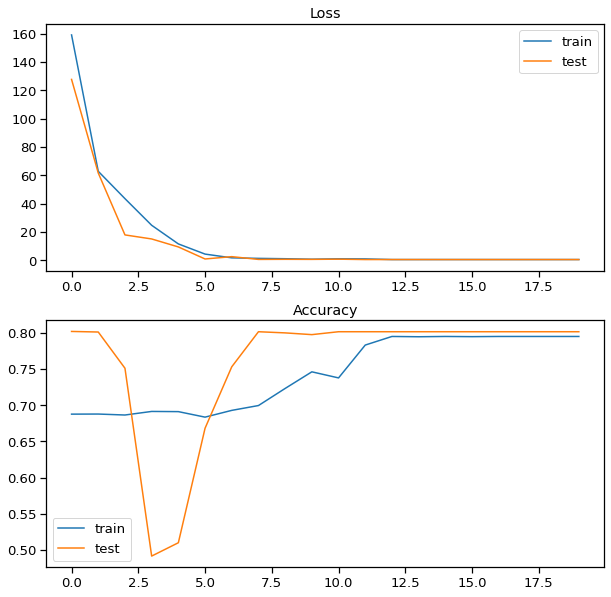

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylim(0.4, 0.6)
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim(0.75, 0.85)
plt.show()

### 4.1.1 Binary crossentropy sa Learning rateom od 0,01

In [18]:
#binary_crossentr
opt = keras.optimizers.Adam(learning_rate=0.01)
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (9,) ))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                320       
                                                                 
 dense_6 (Dense)             (None, 24)                792       
                                                                 
 dense_7 (Dense)             (None, 16)                400       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


In [19]:
X = app_df.drop('Exited', axis=1)
y = app_df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 42) #proveriti sa drugim vrednostima -> 42

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 217.9889 - accuracy: 0.6991 - val_loss: 0.5972 - val_accuracy: 0.8012
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5606 - accuracy: 0.7947 - val_loss: 0.5294 - val_accuracy: 0.8012
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5222 - accuracy: 0.7947 - val_loss: 0.5074 - val_accuracy: 0.8012
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5108 - accuracy: 0.7947 - val_loss: 0.5013 - val_accuracy: 0.8012
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5083 - accuracy: 0.7945 - val_loss: 0.4995 - val_accuracy: 0.8012
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5078 - accuracy: 0.7947 - val_loss: 0.4992 - val_accuracy: 0.8012
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5073 - accuracy: 0.7947 - val_loss: 0.5002 - val_accuracy: 0.8012
Epoc

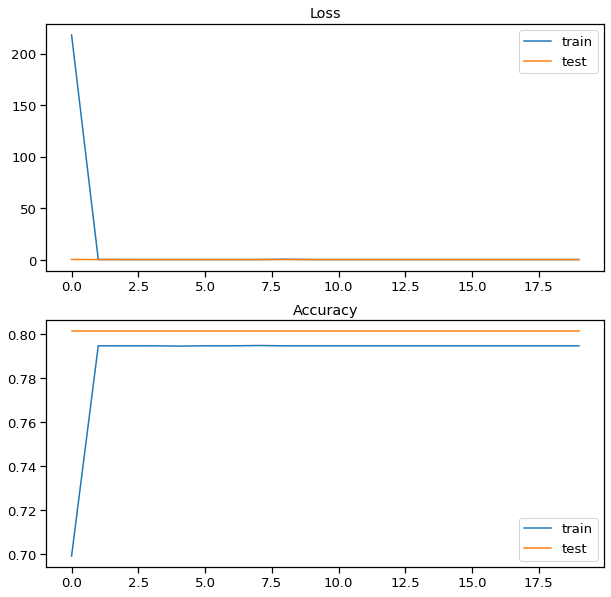

In [20]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylim(0.4, 0.6)
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim(0.75, 0.85)
plt.show()

### 4.1.3 Binary crossentropy sa Learning rateom od 0,0001

In [21]:
#binary_crossentr
opt = keras.optimizers.Adam(learning_rate=0.0001)
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (9,) ))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                320       
                                                                 
 dense_11 (Dense)            (None, 24)                792       
                                                                 
 dense_12 (Dense)            (None, 16)                400       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


In [22]:
X = app_df.drop('Exited', axis=1)
y = app_df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 42) #proveriti sa drugim vrednostima -> 42

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
750/750 [==============================] - 7s 9ms/step - loss: 129.4518 - accuracy: 0.6697 - val_loss: 132.5167 - val_accuracy: 0.8012
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 62.2784 - accuracy: 0.6757 - val_loss: 35.4404 - val_accuracy: 0.7920
Epoch 3/20
750/750 [==============================] - 7s 9ms/step - loss: 46.6183 - accuracy: 0.6756 - val_loss: 18.9030 - val_accuracy: 0.7220
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 34.9250 - accuracy: 0.6755 - val_loss: 14.8665 - val_accuracy: 0.5528
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 24.4782 - accuracy: 0.6728 - val_loss: 17.7714 - val_accuracy: 0.5088
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 18.4876 - accuracy: 0.6799 - val_loss: 11.3113 - val_accuracy: 0.7144
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 16.7743 - accuracy: 0.6755 - val_loss: 16.7167 - val_accurac

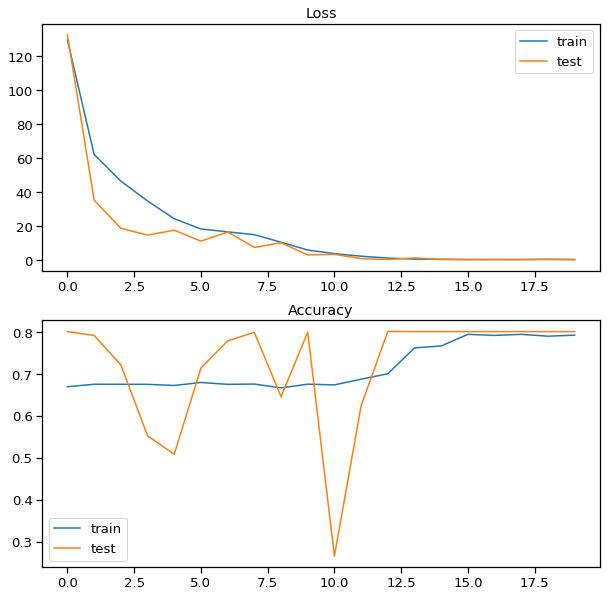

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylim(0.4, 0.6)
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim(0.75, 0.85)
plt.show()

## 4.2 Hinge loss function

In [24]:
#hinge

model =  keras.Sequential()
model.add(Dense(16, activation='relu', input_shape = (9,) ))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss=losses.Hinge(), optimizer='adam', metrics=['accuracy'])
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [25]:
X = app_df.drop('Exited', axis=1)
y = app_df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 1.0000 - accuracy: 0.7947 - val_loss: 1.0000 - val_accuracy: 0.8012
Epoch 

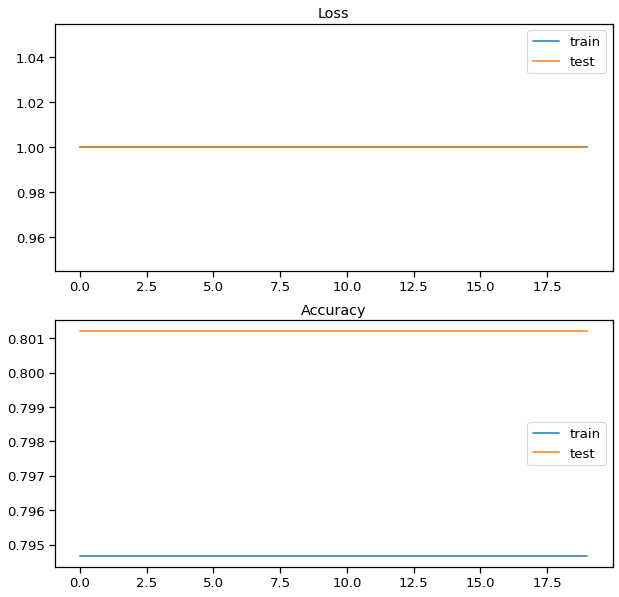

In [27]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylim(0.0, 0.6)
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim(0.75, 0.85)
plt.show()

## 4.3 SquaredHinge loss funcion

In [28]:
#squared hinge

model =  keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(9,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=losses.SquaredHinge(), optimizer=opt, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                160       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [29]:
X = app_df.drop('Exited', axis=1)
y = app_df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
800/800 [==============================] - 5s 5ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 2/20
800/800 [==============================] - 4s 4ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 3/20
800/800 [==============================] - 3s 4ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 4/20
800/800 [==============================] - 3s 4ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 5/20
800/800 [==============================] - 4s 5ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 6/20
800/800 [==============================] - 5s 6ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 7/20
800/800 [==============================] - 3s 4ms/step - loss: 0.8220 - accuracy: 0.7945 - val_loss: 0.7860 - val_accuracy: 0.8035
Epoch 

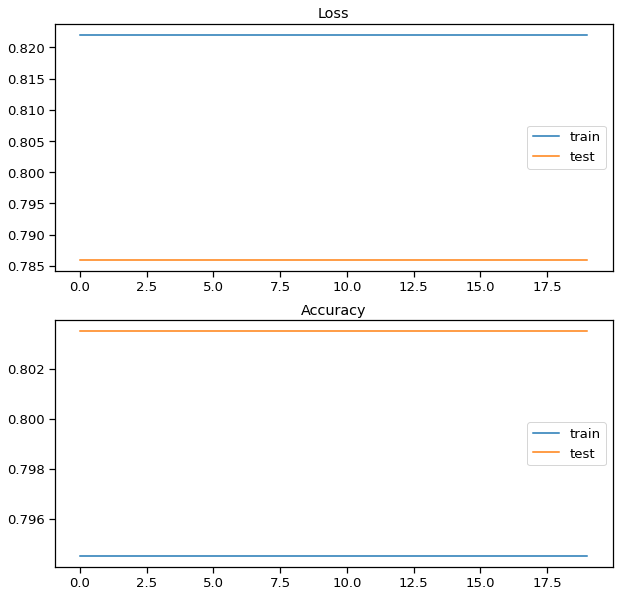

In [30]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylim(0.0, 0.6)
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim(0.75, 0.85)
plt.show()

# 7. Zaključak

Ovim radom smo uvideli mnoge prednosti prilikom korišćenja različitih vrsta neuronskih mreža. Isprobavanjem različitih modela neuronskih mreža zaključili smo da ovaj data set nije baš pouzdan kada su upitanju razultati koje treba da nam donese. Ovi rezultati imaju smisla budući da je nemoguće predvideti ljudsko ponašanje i da sa 14 ulaznih parametara nemoguće precizno predvideti neke rezultate jer na njih utiče ogroman broj parametara. Tako da je ovo nedostatak ovog dataseta.